In [317]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [318]:
# Open the image 
elhas_raster = rio.open("1.png")
print(elhas_raster.meta)

{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 550, 'height': 326, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rasterio\__init__.py:310: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [319]:
# Read, enhance and show the image
elhas_arr = elhas_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))  # 5-95% contrast stretch

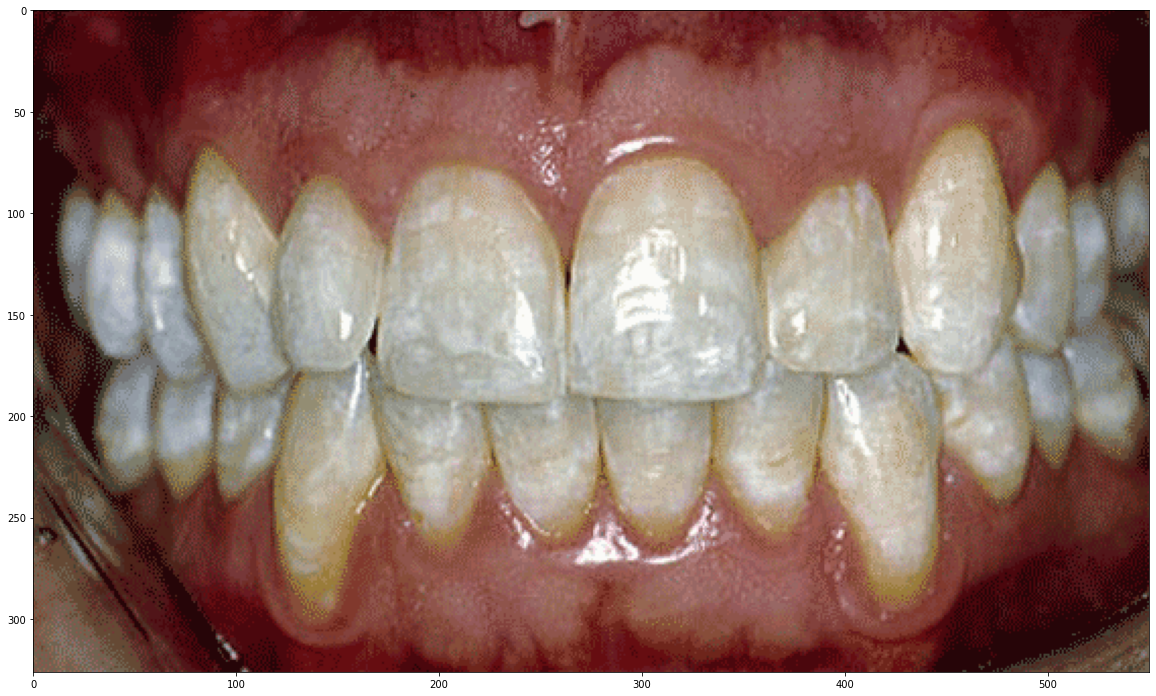

In [320]:
# show the enhanced image
plt.figure(figsize=[20,20])
show(elhas_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [321]:
# create an empty array with same dimension and data type
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = elhas_raster.read(band+1)
print(imgxyb.shape)

(326, 550, 3)


In [322]:
# convert to 1d array
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
print(img1d.shape)

(179300, 3)


In [323]:
cl = cluster.KMeans(n_clusters=7) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

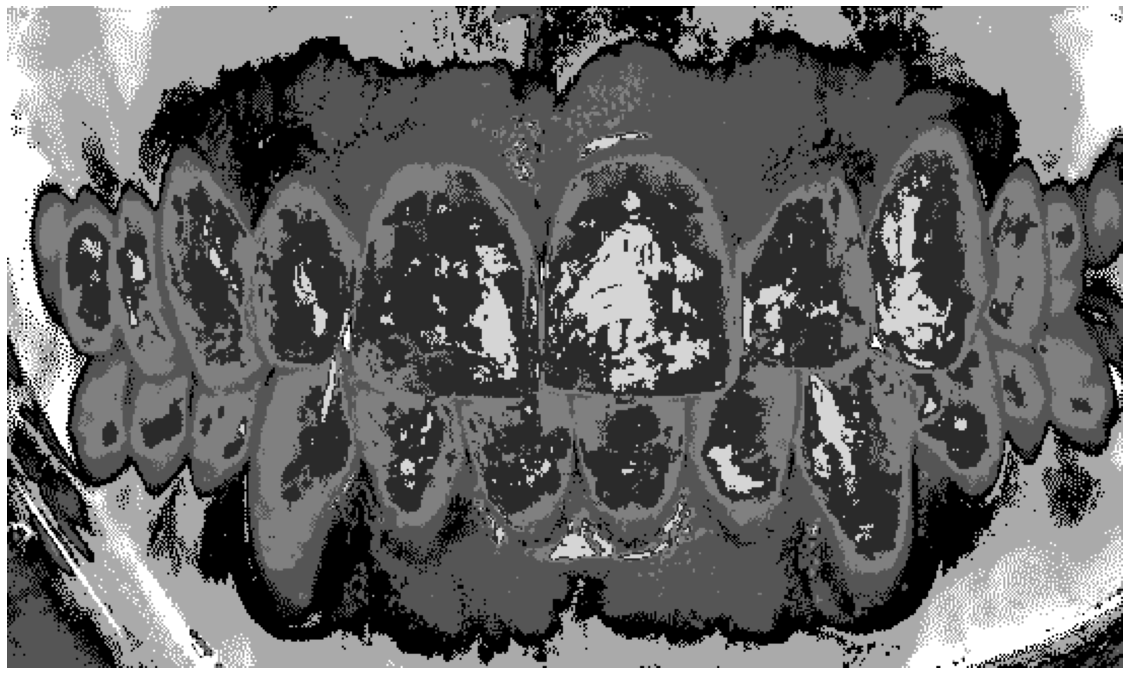

In [324]:
# Create a custom color map to represent our different 4 classes
cmap = colors.LinearSegmentedColormap.from_list("", ["black","white"])
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()

In [347]:
# open the raster image
elmanagel = rio.open("6.png")
# create an empty array with same dimensions and data type 
elman_xyb = np.empty((elmanagel.height, elmanagel.width,elmanagel.count), elmanagel.meta['dtype'])
# loop through the raster bands and fill the empty array in x-y-bands order
for band in range(elman_xyb.shape[2]):
    elman_xyb[:,:,band] = elmanagel.read(band+1)
# convert to 1d array
elman_1d = elman_xyb[:,:,:3].reshape(elman_xyb.shape[0]*elman_xyb.shape[1], elman_xyb.shape[2])
# predict the clusters in the image 
pred = cl.predict(elman_1d)
# reshape the 1d array predictions to x-y-bands shape order (only one band)
elman_cul = pred
elman_cul = elman_cul.reshape(elman_xyb[:,:,0].shape)

C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rasterio\__init__.py:310: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


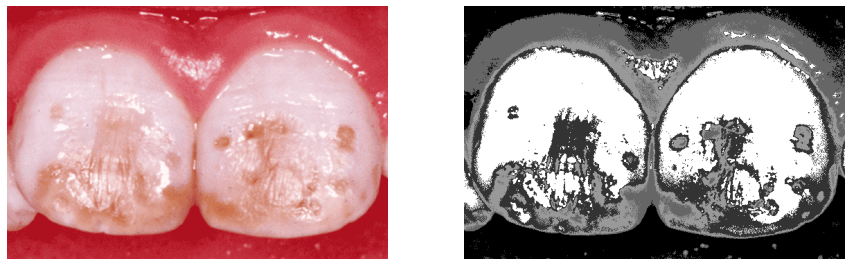

In [348]:
elman_arr = elmanagel.read() # Read the image
vmin, vmax = np.nanpercentile(elman_arr, (5,95)) # 5–95% contrast stretch
# show the original and predicted image
fig, (ax1,ax2) = plt.subplots(figsize=[15,15], nrows=1,ncols=2, sharey=False,)
show(elmanagel, cmap='gray', vmin=vmin, vmax=vmax, ax=ax1)
show(elman_cul, cmap=cmap, ax=ax2)
ax1.set_axis_off()
ax2.set_axis_off()
fig.savefig("pred0.png", bbox_inches='tight')
plt.show()